In [8]:
import math
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

In [9]:
dataForVisualition = pd.read_csv(r"C:\Users\ahmet\Desktop\archive\population_csv.csv", index_col='Year')
data = pd.read_csv(r"C:\Users\ahmet\Desktop\archive\population_csv.csv")

In [10]:
data = data[data['Country Code'] == 'TUR']
dataForVisualition = dataForVisualition[dataForVisualition['Country Code'] == 'TUR']

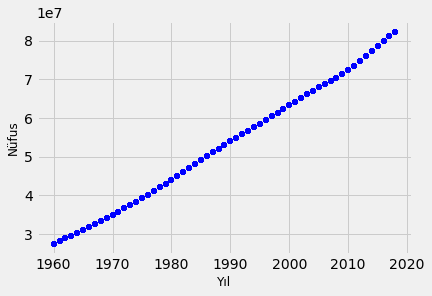

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Nüfus', fontsize=12)
plt.scatter(data.Year,data.Value, color='blue', marker='+')
plt.show()

In [12]:
veri = dataForVisualition.filter(['Value'])
veriseti = veri.values
train_veri_uzunluk = math.ceil(len(veriseti)* 0.8)

In [13]:
MinMaxScale = MinMaxScaler(feature_range=(0,1))
MinMaxScaled_veri = MinMaxScale.fit_transform(veriseti)
MinMaxScaled_veri

array([[0.        ],
       [0.01229895],
       [0.02480487],
       [0.0375409 ],
       [0.05053871],
       [0.06382527],
       [0.07739954],
       [0.09126502],
       [0.10545844],
       [0.12002479],
       [0.13499201],
       [0.15038556],
       [0.1661869 ],
       [0.18232395],
       [0.19869569],
       [0.21523204],
       [0.23186563],
       [0.24861629],
       [0.26560334],
       [0.28299795],
       [0.30090091],
       [0.31936018],
       [0.33826714],
       [0.35737582],
       [0.37634998],
       [0.39494307],
       [0.4130771 ],
       [0.43080598],
       [0.44817857],
       [0.46529374],
       [0.48223663],
       [0.49898911],
       [0.51555067],
       [0.53204838],
       [0.54864717],
       [0.56546204],
       [0.58254264],
       [0.59985041],
       [0.6173008 ],
       [0.63476236],
       [0.65213415],
       [0.6694923 ],
       [0.68687005],
       [0.70408209],
       [0.72088376],
       [0.7371569 ],
       [0.75271537],
       [0.767

In [14]:
train_veri = MinMaxScaled_veri[0:train_veri_uzunluk, :]
x_train = []
y_train = []

for i in range(35, len(train_veri)):
    x_train.append(train_veri[i-35:i, 0])
    y_train.append(train_veri[i,0])
    if i<=35:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.01229895, 0.02480487, 0.0375409 , 0.05053871,
       0.06382527, 0.07739954, 0.09126502, 0.10545844, 0.12002479,
       0.13499201, 0.15038556, 0.1661869 , 0.18232395, 0.19869569,
       0.21523204, 0.23186563, 0.24861629, 0.26560334, 0.28299795,
       0.30090091, 0.31936018, 0.33826714, 0.35737582, 0.37634998,
       0.39494307, 0.4130771 , 0.43080598, 0.44817857, 0.46529374,
       0.48223663, 0.49898911, 0.51555067, 0.53204838, 0.54864717])]
[0.5654620433184236]



In [15]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.fit(x_train,y_train, validation_split=0.2, batch_size=1, epochs=60)

Epoch 1/60
10/10 [==============================] - 1s 138ms/step - loss: 0.1691 - val_loss: 0.1095
Epoch 2/60
10/10 [==============================] - 0s 17ms/step - loss: 0.0240 - val_loss: 0.0193
Epoch 3/60
10/10 [==============================] - 0s 16ms/step - loss: 0.0087 - val_loss: 9.0733e-06
Epoch 4/60
10/10 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 1.7511e-04
Epoch 5/60
10/10 [==============================] - 0s 15ms/step - loss: 5.4937e-04 - val_loss: 0.0010
Epoch 6/60
10/10 [==============================] - 0s 15ms/step - loss: 1.6029e-04 - val_loss: 7.4338e-05
Epoch 7/60
10/10 [==============================] - 0s 15ms/step - loss: 8.3628e-05 - val_loss: 2.4010e-04
Epoch 8/60
10/10 [==============================] - 0s 15ms/step - loss: 4.1107e-05 - val_loss: 6.4294e-06
Epoch 9/60
10/10 [==============================] - 0s 15ms/step - loss: 2.4071e-05 - val_loss: 7.7991e-05
Epoch 10/60
10/10 [==============================] - 0s 15ms/ste

In [20]:
test_veri = MinMaxScaled_veri[train_veri_uzunluk - 35: , :]
x_test = []
y_test = veriseti[train_veri_uzunluk:,:]
for y in range(35,len(test_veri)):
    x_test.append(test_veri[y-35:y, 0])

In [21]:
x_test = np.array(x_test)

In [22]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [23]:
tahmin_degerleri = model.predict(x_test)
tahmin_degerleri = MinMaxScale.inverse_transform(tahmin_degerleri)
tahmin_degerleri

array([[70612540.],
       [71503064.],
       [72382720.],
       [73254850.],
       [74124920.],
       [74999490.],
       [75885000.],
       [76786530.],
       [77707060.],
       [78647690.],
       [79607860.]], dtype=float32)

<ipython-input-24-cb619f08a1e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tahmin['Tahminler'] = tahmin_degerleri


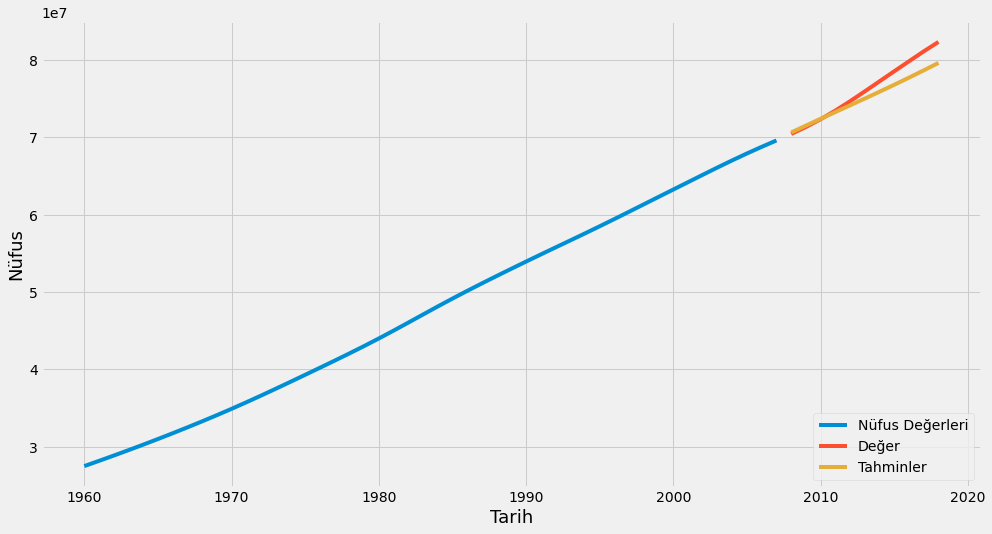

In [24]:
train = dataForVisualition[:train_veri_uzunluk]
tahmin = dataForVisualition[train_veri_uzunluk:]
tahmin['Tahminler'] = tahmin_degerleri

plt.figure(figsize=(15,8))
plt.xlabel("Tarih", fontsize=18)
plt.ylabel('Nüfus', fontsize=18)
plt.plot(train["Value"])
plt.plot(tahmin[['Value','Tahminler']])
plt.legend(['Nüfus Değerleri','Değer','Tahminler'],loc='lower right')
plt.show()

In [25]:
tahmin

,Country Name,Country Code,Value,Tahminler
Year,,,,
2008,Turkey,TUR,70418604,70612544.0
2009,Turkey,TUR,71321399,71503064.0
2010,Turkey,TUR,72326988,72382720.0
2011,Turkey,TUR,73443863,73254848.0
2012,Turkey,TUR,74653016,74124920.0
2013,Turkey,TUR,75928564,74999488.0
2014,Turkey,TUR,77231907,75885000.0
2015,Turkey,TUR,78529409,76786528.0
2016,Turkey,TUR,79821724,77707056.0


In [26]:
RmseDeger = np.sqrt(np.mean(tahmin_degerleri - y_test)**2)
print ("Root Mean Squared Error: ", RmseDeger)

Root Mean Squared Error:  1053216.1818181819
